In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats


# generate full model data
def fmodel(x, m, b):
    return m*x+b

# generate reduced model
def rmodel(x, b):
    return b

# generate data from the full model
x=np.linspace(0, 2, 25)
y=fmodel(x, 0.001, 0.9)

# instantiate a random number generator
rng = np.random.default_rng()
y += rng.normal(0, (max(y)-min(y)), 25)

# fit to the full model
fpopt, fpcov = curve_fit(fmodel, x, y)
# fit to the reduced model
rpopt, rpcov = curve_fit(rmodel, x, y)

# compute full model ss residuals 
resfull = y - fmodel(x, *fpopt)
# compute reduced ss residuals
resred = y - rmodel(x, *rpopt)

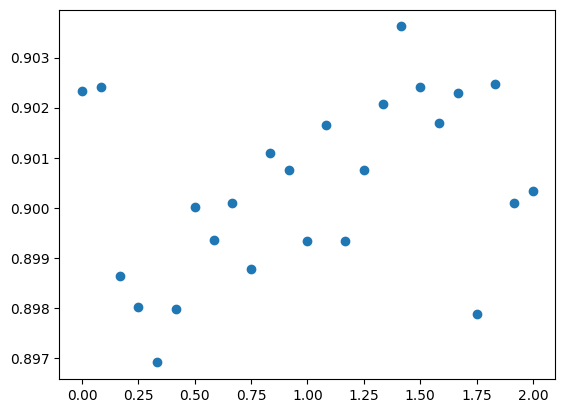

In [2]:
plt.scatter(x,y)
plt.show()

In [5]:
def ftest(resred, resfull, dofred, doffull):
    if not len(resred) == len(resfull):
        return 'the lengths of the residuals arrays must be the same.'
        
    else:
        ssered=np.sum(np.square(resred))
        ssefull=np.sum(np.square(resfull))
        N=len(resred)
        num = ((ssered-ssefull)/(dofred-doffull))
        denom = ((ssefull)/(doffull))
        f = num/denom
        p = stats.f.cdf(f, dofred-doffull, doffull)
        return f, p

# dofred
# number of degrees of freedom in the residuals data set for the 
# reduced model: 
# N-(number of parameters in reduced model)
dofred = -1 + len(resred)
# doffull
# similarly definied
doffull = -2 + len(resfull)

ftest(resred, resfull, dofred, doffull)

(np.float64(2.80698345679905), np.float64(0.8926012228846352))